735 980


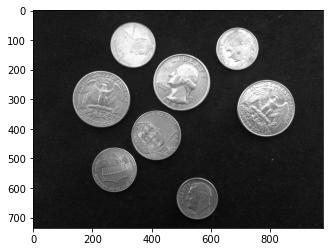

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

image = cv2.imread('coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
print(height, width)

plt.imshow(gray, cmap='gray')
plt.show()

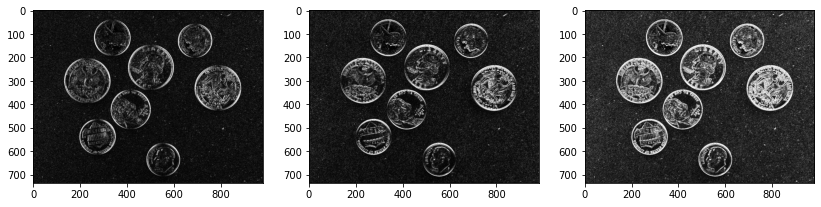

In [ ]:
img_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)


img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0);

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.imshow(img_sobel_x, cmap='gray')

plt.subplot(132)
plt.imshow(img_sobel_y, cmap='gray')

plt.subplot(133)
plt.imshow(img_sobel, cmap='gray')

plt.show()

245.0


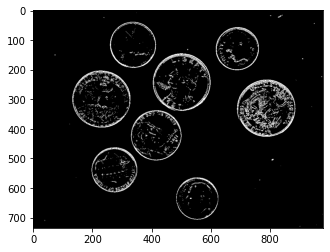

In [ ]:
threshold, binary_img = cv2.threshold(img_sobel, 245, 255, cv2.THRESH_BINARY)

print(threshold)
plt.imshow(binary_img, cmap='gray')
plt.show()

In [ ]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

In [ ]:
def Hough_Circles(img, threshold=290, r_min=70, r_max=100):
    
    rows, cols = img.shape

    hough_space = np.zeros((r_max, rows, cols))
    circle_index = (img == 255).nonzero()

    x, y = circle_index
    sinang = dict() 
    cosang = dict()

    for angle in range(0,360): 
        sinang[angle] = np.sin(angle * np.pi / 180)
        cosang[angle] = np.cos(angle * np.pi / 180)

    for r in range(r_min, r_max):

        for itheta in range(0, 360):

            x1 = (x - r * cosang[itheta]).astype(int)
            y1 = (y - r * sinang[itheta]).astype(int)

            temp_x = x1[np.where((x1 > 0) & (x1 < rows) & (y1 > 0) & (y1 < cols))]
            temp_y = y1[np.where((y1 > 0) & (y1 < cols) & (x1 > 0) & (x1 < rows))]

            hough_space[r, temp_x, temp_y] = hough_space[r, temp_x, temp_y] + 1 


    circles_value = []

    for r, v in enumerate(hough_space):
      max = np.where(v >= threshold)

      if max[0].size > 0:
          temp_v = v[max]
          for center_value in np.unique(np.sort(temp_v)):
              c = np.where(v == center_value)

              if c[0].size > 1:  
                  for i, j in zip(c[0], c[1]):
                      circles_value.append(np.array([int(j), int(i), r]))
              else:
                  circles_value.append(np.array([int(c[1]), int(c[0]), r]))

    return circles_value

In [ ]:
def display_Circles(img, circles):

  for c in circles:
      cv2.circle(img, (c[0], c[1]), c[2], (255, 0, 0), 10)
      cv2.circle(img, (c[0], c[1]), 2, (0, 255, 0), 10)

  images = [image, copy_img]
  titles = ['Original Image', 'Hough circle Detected']
  plot_img(images, titles)

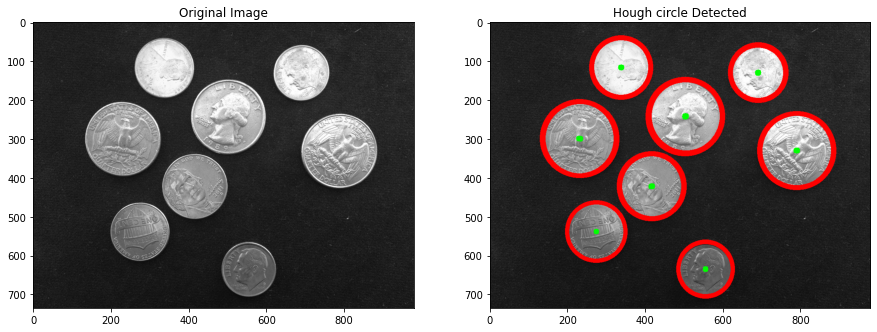

In [ ]:
circle = Hough_Circles(binary_img)
copy_img = image.copy()
display_Circles(copy_img, circle)